#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 213074005, 213230012
4. Write your names here: Mihir Chandrahas Jog, Manuraj P M
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [2]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    X = np.array(X)
    mean_column = X.mean(axis=0) #Mean in column wise of matrix X by applying axis=0
    std_devi_column = X.std(axis=0) #column wise standard deviation of matrix x by applying axis=0
    result_matrix = (X-mean_column)/std_devi_column #Normalize matrix is given by each element is substracted by mean and divided by standard deviation
    return result_matrix                            #Now return the result matrix 
    raise NotImplementedError()

In [3]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [4]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    one_dim = w.shape[0]-X.shape[1] #Dimesion of one matrix is diference b/w coloumns of w and rows of X
    b = np.ones([X.shape[0],one_dim]) # Define extra column for X as b as t
    h = np.column_stack((X,b)) #[X 1] augumented matrix by stacking X column wise to 1
    y = h.dot(np.transpose(w)) #Now the y will be matrix multipication of augumented matrix with transpose of w
    return y #Let us return the result matrix y
    raise NotImplementedError()


In [5]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [6]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    X = np.array(X)
    one_dim = w.shape[0]-X.shape[1] #Dimesion of one matrix is diference b/w coloumns of w and rows of X
    b = np.ones([X.shape[0],one_dim]) # Define extra column for X as b as t
    h = np.column_stack((X,b)) #[X 1] augumented matrix by stacking X column wise to 1
    y = h.dot(np.transpose(w)) #Now the y will be matrix multipication of augumented matrix with transpose of w
    squre_error = (t-y)**2      #squred error matrix
    mean_of_error = squre_error.mean() #Expected value of the error is same as mean 
    return mean_of_error            #return the Expected value
    raise NotImplementedError()

In [7]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [8]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    one_dim = w.shape[0]-X.shape[1] #Dimesion of one matrix is diference b/w rows of w and columns of X
    b = np.ones([X.shape[0],one_dim]) # Define extra column for X as b as t
    h = np.column_stack((X,b)) #[X 1] augumented matrix by stacking X column wise to 1
    y = h.dot(np.transpose(w)) #Now the y will be matrix multipication of augumented matrix with transpose of w
    error_mat = t-y                 #error matrix given by t-y
    abs_error = np.absolute(error_mat) #Absolute value of the error matrix 
    mean_of_error = abs_error.mean() #Expected value of the error
    return mean_of_error            #return the Expected value
    raise NotImplementedError()

In [9]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [10]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    h = MSE_Loss (X, t, w, lamda) #MSE for the vectors
    bias = w.shape[0]-X.shape[1] #Find number of bias term
    w[-bias:] =0                    #Bias terms in to zero
    return h+ lamda*np.sqrt((w**2).sum(axis=0))#Return L2 loss         
    raise NotImplementedError()

In [11]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [12]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    h= MSE_Loss (X, t, w, lamda)
    bias = w.shape[0]-X.shape[1] #Find number of bias term
    w[-bias:] = 0                 #Bias terms in to zero
    return h +np.absolute(w).sum(axis=0)*lamda
    raise NotImplementedError()

In [13]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [14]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE
    std_t = t.std(axis=0)                           #standard deviation along t matrix
    return np.sqrt(MSE_Loss(X, t, w, lamda=0))/std_t # normalizing root of MSE_loss
    raise NotImplementedError()

In [15]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [16]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    first_part = 2*(t- Prediction (X, w))/t.shape[0]# To find the 2/N(t_i-wx_i) part
    one_dim = w.shape[0]-X.shape[1] #Dimesion of one matrix is diference b/w coloumns of w and rows of X
    b = np.ones([X.shape[0],one_dim]) # Define extra column for X as b as t
    h = np.column_stack((X,b)) #[X 1] augumented matrix by stacking X column wise to 1
    full = np.array(first_part).dot(-h) # Multiplying first part with -[X 1]
    return full #return the full part
    raise NotImplementedError()

In [17]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [18]:
from numpy.core.fromnumeric import transpose
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    y = Prediction (X, w)#Prediction of given problem
    k = np.sign(t-y)/t.shape[0] #Modulus term i.e, sign of (t-y)/N
    one_dim = w.shape[0]-X.shape[1] #Dimesion of one matrix is diference b/w coloumns of w and rows of X
    b = np.ones([X.shape[0],one_dim]) # Define extra column for X as b as t
    h = np.column_stack((X,b)) #[X 1] augumented matrix by stacking X column wise to 1
    result_mat = np.array(k).dot(-h) #multiplying -[X 1]
    return result_mat #return the result
    raise NotImplementedError()

In [19]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [20]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    mse = MSE_Gradient (X, t, w, lamda) #MSE gradient
    bias = w.shape[0]-X.shape[1] #Find number of bias term
    w[-bias:] = 0                 #Bias terms in to zero
    return mse + lamda*(w)/(np.sqrt((w**2).sum(axis=0))) #Sum of MSE gradient and gradient of L2 norm of w
    raise NotImplementedError()

In [21]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [22]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    mse = MSE_Gradient(X,t,w,lamda) #MAE gradient
    bias = w.shape[0]-X.shape[1] #Find number of bias term
    w[-bias:] = 0                 #Bias terms in to zero
    return mse + lamda*np.sign(w)
    raise NotImplementedError()

In [23]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [24]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    for x in range(max_iter):             #iteration in for loop for loop
      w = w-(lr*(gradfunc(X,t,w,lamda)))  #Updating w
    w_final = w                           #assign final w
    train_loss_final = (lossfunc(X,t,w,lamda)) #Training loss
    validation_loss_final = (lossfunc(X_val,t_val,w,lamda)) #Validation loss
    validation_NRMSE = NRMSE_Metric(X_val,t_val,w)#Validation NRMSE
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    raise NotImplementedError()
    
    

In [25]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [26]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    X = np.array(X)
    t = np.array(t)
    clms = 1
    b = np.ones([X.shape[0],clms]) # Define extra column for X as b as t
    X = np.column_stack((X,b)) #Agument b to X Column wise [X 1]
    temp = np.transpose(X).dot(X) #X^TX term
    term = (temp + lamda*(np.identity(X.shape[1])))/X.shape[0]#assign (X^TX+lamda*I(N))/N as term
    term1 = np.linalg.inv(term)                                #Pesudo inverse
    term2 = (np.transpose(X).dot(t))/X.shape[0]                #Second term as X^T*target_value
    w = term1.dot(term2)                                       #W = term1*term2
    return w                                                   #  Return w
    raise NotImplementedError()

In [27]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [28]:
data = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv')#Readig the CSV file
data.head()                                                               #Display the CSV

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [29]:
data.info() #Let us check the missing value data type etc for the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6082 entries, 0 to 6081
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      6082 non-null   float64
 1   Present_Tmin      6082 non-null   float64
 2   LDAPS_RHmin       6082 non-null   float64
 3   LDAPS_RHmax       6082 non-null   float64
 4   LDAPS_Tmax_lapse  6082 non-null   float64
 5   LDAPS_Tmin_lapse  6082 non-null   float64
 6   LDAPS_WS          6082 non-null   float64
 7   LDAPS_LH          6082 non-null   float64
 8   LDAPS_CC1         6082 non-null   float64
 9   LDAPS_CC2         6082 non-null   float64
 10  LDAPS_CC3         6082 non-null   float64
 11  LDAPS_CC4         6082 non-null   float64
 12  LDAPS_PPT1        6082 non-null   float64
 13  LDAPS_PPT2        6082 non-null   float64
 14  LDAPS_PPT3        6082 non-null   float64
 15  LDAPS_PPT4        6082 non-null   float64
 16  lat               6082 non-null   float64


**Summary**

*   For given csv there is no missing values and all the values are in float
*   There are 6082 datas and 21 independent datas
* In 21th column we have target value



**Spliting the dataset into Training and validation set**

In [52]:
#this code snippet was taken from https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
mask = np.random.rand(len(data)) < 0.8 #select mask as 80% of the data set
train = data[mask]                    #set 80% in to train
validate = data[~mask]                    #rest 20% in to validation

In [53]:
X_train = train.loc[:,'Present_Tmax':'Solar radiation'].values #assign train values of X, which will be : ALL rown ; column first to last but one (since last one is target )
X_validate = validate.loc[:,'Present_Tmax':'Solar radiation'].values  #assign test values of X ,which will be : ALL rown ; column first to last but one (since last one is target )

**Target in to training and validation**

In [56]:
t_train = train['Next_Tmax'].values  #assign target train vector which is the last column
t_validate = validate['Next_Tmax'].values #assign target validation vector which is the last column

initial weight array is all 1's

In [55]:
X_train_row,X_train_col = np.shape(X_train) #Shape of data vector
my_w = np.ones(X_train_col+1)              #Initial weight matrix is with dimension one greater than data matrix 

Normalize all arrays

In [57]:
#normalize all the arrays by passing it to normalize function
X_train_norm = Normalize(X_train)
X_validate_norm = Normalize(X_validate)
t_train_norm = Normalize(t_train)
t_validate_norm = Normalize(t_validate)

**best lamda for MSE+lamda*L2(w) loss function**

In [65]:
validation_loss = [] #Array to store validation loss
l_array = []         #Array to store diifernt lamda values
w_array2 = [my_w]     #array to store w values for different lamda and applied first w
loss_array = []     #to store loos error
lamda = 0                  #Initilize lamda
key = 0                    #Key to access weight array
while(lamda<=1):          #Let us try for lamda=10
  lamda += 0.01 
  a_result = Gradient_Descent (X_train_norm, X_validate_norm, t_train_norm, t_validate_norm, my_w, lamda, 1000, 1e-5, 1e-2, L2_Loss, L2_Gradient)#Find w and trainig loss
  w_array2.append(a_result[0])               #Update w values
  loss_array.append(a_result[1])            #Loss for training data
  validation_loss.append(L2_Loss(X_validate,t_validate,w_array2[key],lamda))   #Validation loss with updated w
  l_array.append(1/lamda)                   #1/lamda array
  key += 1


In [66]:
loss_array1 = np.sqrt(loss_array)        #RMSE of training loss
validation_loss1 = np.sqrt(validation_loss)  #RMSE for validation loss

In [67]:
l2_min_weight_index = np.argmin(validation_loss1) #find the index of minimum value of loss which will also be the index of best lamda
l2_min_weight_index

99

In [68]:
best_lamda_L2 = 1/(l_array[l2_min_weight_index])
print("Best lamda for L2 loss:",best_lamda_L2)

Best lamda for L2 loss: 1.0000000000000007


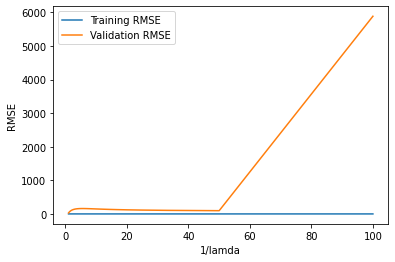

In [69]:
%matplotlib inline
plt.figure()
plt.plot(l_array,loss_array1,label='Training RMSE')
plt.plot(l_array,validation_loss1,label='Validation RMSE'),
plt.xlabel('1/lamda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Summary**

1.   We can see that training error reduces as increasing model complexity
2.   From 1/lamda > 40 there is overfitting occured therefore we have to select lamda in min of validation error (sweet spot range)



In [71]:
weight_L2_LOSS = w_array2[l2_min_weight_index+1]   #weight for desired lamda we can store in to variable weight_L2_LOSS
print("Best weights for L2:")
print(weight_L2_LOSS)

Best weights for L2:
[ 0.1161485   0.08625109 -0.05479408 -0.03266043  0.1717167   0.12663569
 -0.07322122  0.03385108 -0.06910912 -0.06846774 -0.06857748 -0.05803767
 -0.00990691  0.00157854 -0.01404729 -0.01793156 -0.00395102 -0.00196949
 -0.02207854  0.00556746  0.00965085  0.        ]


In [77]:
print("Best Validation loss for L2:")
print(validation_loss1[l2_min_weight_index] )#Validation RMSE

Best Validation loss for L2:
30.19428443318417


In [79]:
print("Normalised Validation RMSE:")
Normalize(validation_loss1)[l2_min_weight_index] #Normalised Validation RMSE

Normalised Validation RMSE:


-0.22479849840097285

**best lamda for MSE+lamda*L1(w) loss function**

In [135]:
validation_loss_L1 = [] #Array to store validation loss
l_array = []             #Array to store diifernt lamda values
w_array = [my_w]         #array to store w values for different lamda
loss_array_L1 = []           #to store loos error
lamda =0
key=0 
while(lamda<=10):
  lamda += 0.1 
  a_result = Gradient_Descent (X_train_norm, X_validate_norm, t_train_norm, t_validate_norm, my_w, lamda, 1000, 1e-5, 1e-2, L1_Loss, L1_Gradient)
  w_array.append(a_result[0])
  loss_array_L1.append(a_result[1])
  validation_loss_L1.append(L1_Loss(X_validate_norm,t_validate_norm,w_array[key],lamda))
  l_array.append(1/lamda)
  key += 1


In [136]:
loss_array_L1_1 = np.sqrt(loss_array_L1)
validation_loss_L1_1 = np.sqrt(validation_loss_L1)

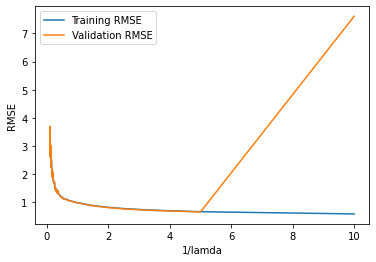

In [137]:
%matplotlib inline
plt.figure()
plt.plot(l_array,loss_array_L1_1,label='Training RMSE')
plt.plot(l_array,validation_loss_L1_1,label='Validation RMSE')
plt.xlabel('1/lamda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [138]:
l_array.index(5)

1

In [139]:
l1_min_weight_index=np.argmin(validation_loss_L1_1) # #find the index of minimum value of loss which will also be the index of best lamda
l1_min_weight_index

1

In [140]:
best_lamda_L1=1/(l_array[l1_min_weight_index])
print("best lamda for L1 loss:")
best_lamda_L1


best lamda for L1 loss:


0.2

In [141]:
weight_L1 = w_array[l1_min_weight_index+1]#weight for desired lamda here w array have first weight as [1,1,1,1....]
print("Best weights for L1 loss:")
weight_L1

Best weights for L1 loss:


array([ 1.65860139e-01,  1.89131223e-03,  1.36899711e-04, -1.52238881e-03,
        6.07266449e-01,  1.35988447e-03, -4.13598205e-02,  5.80631426e-04,
       -1.93578945e-02, -2.29977729e-03, -1.09666297e-03, -2.73334931e-02,
       -1.89512249e-03, -1.56299222e-03, -2.63931372e-03, -9.81925330e-04,
        1.57853014e-03, -2.63243727e-03,  5.91981835e-04, -1.36783507e-04,
       -1.22943465e-03,  0.00000000e+00])

In [142]:
print("Least L1 Validation loss:")
print(validation_loss_L1_1[1])      #Validation MRSE

Least L1 Validation loss:
0.6528850276804212


In [143]:
print("Normalised Validation RMSE:")
Normalize(validation_loss_L1)[1] #Normalised Validation RMSE

Normalised Validation RMSE:


-0.7514114459483199

**bset lamda for pseudo inverse method**

In [97]:
l_array = []        #Array to store diifernt lamda values
w_array_p = [my_w]        #array to store w values for different lamda
loss_array_pse = []     #to store loos error
validation_MSE_array_pse = []#To store validation RMSE
lamda = 0
key = 0 
while(lamda<=10):
  lamda += 0.1 
  a_result = Pseudo_Inverse (X_train_norm, t_train_norm, lamda)
  w_array_p.append(a_result)
  validation_MSE_array_pse.append(L1_Loss(X_validate_norm,t_validate_norm,w_array_p[key],lamda))
  loss_array_pse.append(L1_Loss(X_train_norm,t_train_norm,my_w,lamda))
  l_array.append(1/lamda)
  key += 1


In [104]:
loss_array_pse1 = np.sqrt(loss_array_pse)
validation_MSE_array1 = np.sqrt(validation_MSE_array_pse)

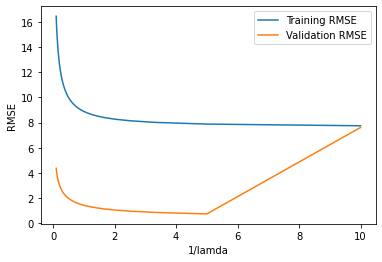

In [99]:
%matplotlib inline
plt.figure()
plt.plot(l_array,loss_array_pse1,label='Training RMSE')
plt.plot(l_array,validation_MSE_array1,label='Validation RMSE'),
plt.xlabel('1/lamda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [105]:
pse_min_weight_index = np.argmin(validation_MSE_array_pse) # #find the index of minimum value of loss which will also be the index of best lamda
pse_min_weight_index

1

In [106]:
best_lamda_Pes = 1/(l_array[pse_min_weight_index])
print("best lamda for pseudo inverse  method:")
best_lamda_Pes


best lamda for pseudo inverse  method:


0.2

In [108]:
w_pesud = w_array_p[pse_min_weight_index+1]
print("Best weights for pseudo inverse method:")
w_pesud

Best weights for pseudo inverse method:


array([ 0.15523723,  0.04360852,  0.12936769, -0.04056138,  0.58721616,
        0.0725416 , -0.13170335,  0.079266  , -0.09182421, -0.0743816 ,
       -0.0469021 , -0.07639996, -0.02353704,  0.06237454, -0.00589521,
       -0.00507689, -0.01347794, -0.03903572, -0.07982029,  0.10132676,
        0.01761667,  0.        ])

In [112]:
print("Validation RMSE:")
validation_MSE_array1[pse_min_weight_index] #Validation RMSE

Validation RMSE:


0.7508315332143086

In [111]:
print("Validation NRMSE:")
Normalize(validation_MSE_array_pse)[pse_min_weight_index] #validation NMRSE

Validation NRMSE:


-1.3574575348297442

 **TEST DATA**

In [113]:
data_test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv')#Readig the CSV file
data_test.head()                                                               #Display the CSV

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,27.9,19.9,58.964123,97.821373,26.798375,20.828714,6.397833,75.366664,0.197580,0.306510,0.423613,0.842868,0.0,0.0,0.0,0.025890,37.6046,126.991,212.3350,2.7850,5992.895996
1,30.3,21.0,51.617828,89.577393,29.069652,22.979956,6.199736,54.449329,0.193229,0.311707,0.431707,0.816846,0.0,0.0,0.0,0.031924,37.6046,127.032,44.7624,0.5141,5869.312500
2,30.2,22.5,47.538521,85.529457,29.696974,23.554281,6.269956,14.450297,0.200518,0.301901,0.410575,0.825653,0.0,0.0,0.0,0.011254,37.5776,127.058,33.3068,0.2661,5863.555664
3,30.7,22.0,59.407711,98.806969,28.234872,21.380987,6.755825,105.226457,0.186295,0.302106,0.397818,0.781959,0.0,0.0,0.0,0.041682,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.0,21.8,55.004128,92.867073,27.988202,22.164184,6.241006,104.791246,0.173245,0.291852,0.447998,0.823050,0.0,0.0,0.0,0.014004,37.5507,127.135,35.0380,0.5055,5859.552246


In [115]:
data.head() #T0 show train data

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [117]:
X_test = data_test.loc[:,'Present_Tmax':'Solar radiation'].values #Test data
X_test_norm = Normalize(X_test) #Normalise test data

# **Predictions**

**L2 Prediction**

In [118]:
y_L2 = Prediction (X_test, weight_L2_LOSS)
y_L2 

array([60.50559823, 64.01502717, 63.50733371, ..., 51.16438588,
       50.56931828, 49.45587706])

**Summary**

> L2 Prediction is not giving a best values because its minimum validation loss is in range 30.19428443318417



**L1 prediction**

In [144]:
y_L1 = Prediction (X_test, weight_L1)
y_L1

array([13.05996029, 14.90360302, 15.25096485, ..., 13.86715725,
       14.24611883, 14.72492658])

No handles with labels found to put in legend.


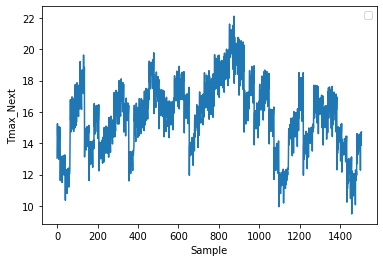

In [130]:
plt.plot(range(0,len(y_L1)),y_L1)#Plot for variation of prediction value with number of samples
plt.xlabel('Sample')
plt.ylabel('Tmax_Next')
plt.legend()

**Prediction using Pesudo Inverse Method**

In [131]:
y_pse = Prediction (X_test, w_pesud)
y_pse

array([114.55706316, 125.18790854, 122.89215785, ...,  97.94139108,
        95.82924808,  93.11571877])

**We Got the best Loss and Predictions for L1 loss. Thus we will write those values, in the file.**

In [132]:
data_test['Tmax_Next'] = y_L1       #in the dataset, we form a new coloumn 'Tmax_Next' and in that, we will save our results

In [133]:
data_test.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Tmax_Next
0,27.9,19.9,58.964123,97.821373,26.798375,20.828714,6.397833,75.366664,0.197580,0.306510,0.423613,0.842868,0.0,0.0,0.0,0.025890,37.6046,126.991,212.3350,2.7850,5992.895996,13.059960
1,30.3,21.0,51.617828,89.577393,29.069652,22.979956,6.199736,54.449329,0.193229,0.311707,0.431707,0.816846,0.0,0.0,0.0,0.031924,37.6046,127.032,44.7624,0.5141,5869.312500,14.903603
2,30.2,22.5,47.538521,85.529457,29.696974,23.554281,6.269956,14.450297,0.200518,0.301901,0.410575,0.825653,0.0,0.0,0.0,0.011254,37.5776,127.058,33.3068,0.2661,5863.555664,15.250965
3,30.7,22.0,59.407711,98.806969,28.234872,21.380987,6.755825,105.226457,0.186295,0.302106,0.397818,0.781959,0.0,0.0,0.0,0.041682,37.6450,127.022,45.7160,2.5348,5856.964844,14.472925
4,31.0,21.8,55.004128,92.867073,27.988202,22.164184,6.241006,104.791246,0.173245,0.291852,0.447998,0.823050,0.0,0.0,0.0,0.014004,37.5507,127.135,35.0380,0.5055,5859.552246,14.392509


In [146]:
#data_test.to_csv('213074005_213230012_1.csv')     #saving the csv file

**R2 Score for best predictor**

Equation for R2 score given by:

* $R^2 = 1 - \frac{RSS}{TSS}$


 Where,

* RSS -	sum of squares of residuals

* TSS	-	total sum of squares








*   $RSS=\sum \limits_{i=1}^{n} (t_i-f(x_i))^2$

Where,
* $t_i	=	i^th$ value of the variable to be predicted
* $f(x_i)	=$	predicted value of *t_i* 
* n	=	upper limit of summation







$\mathrm{TSS}=\sum_{i=1}^{n}(t_{i}-\bar{t})^{2}$

Where,

*   ${n}	=$	number of observations
*  $t_{i}	=$ target	value in a sample
*  $\bar{t}	=$	mean value of a target sample

**Reference of equation for R2** [link text](https://www.google.com/search?q=r2+score&oq=R2+score&aqs=chrome.0.0i131i433i512j0i512l9.5721j0j7&sourceid=chrome&ie=UTF-8#wptab=s:H4sIAAAAAAAAAONgVuLUz9U3MDWzKMh4xGjCLfDyxz1hKe1Ja05eY1Tl4grOyC93zSvJLKkUEudig7J4pbi5ELp4djFJuqaUJieWZObnJeY45-clpxaUuOUX5ZbmJC5iVUnOT01Ly0zOTM0rUchPU0hJLUktys3MAytXSIMoAwDDIszGhwAAAA)





In [172]:
a = np.square(t_validate- Prediction (X_validate,w_array[l1_min_weight_index])) #Indivagual term to be summed in RSS
rss_val = np.sum(a)                                                             #Sum of squre gives RSS

b=np.square(t_validate - np.mean(t_validate))                                   #Indivigual TSS elements

tss_val= np.sum(b)                                                              #sum gives TSS

R2_score= 1-(rss_val/tss_val)                                                   #R2 score
print('R2 Score:')
R2_score

R2 Score:


0.6975912317416243

#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code):


**Other References:**

1. Class Notes
2. MS Teams Discussion Threads

**Coursemates with whom we discussed:**

1. Anal Prakash Sharma: 213079011
2. Paavan Gouniyal: 213070051
3. Aswin Thomas: 213074003
4. Rajat Sankhla: 213079008
5. Abhishek Verma: 213070024
6. Surbhika Rastogi: 213070056
7. Ankit Singh: 213070029
8. Prafull Bhosale: 20301005

Mainly Discussed Mathematical Expressions/ Formulas and Parameter tunning with these people.
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): **Internet Sources Reffered:**

https://www.w3schools.com/python/python_conditions.asp
https://www.w3schools.com/python/python_for_loops.asp
https://stackoverflow.com/questions/32827269/adding-columns-to-matrix-in-python/32827597
https://www.educative.io/edpresso/how-to-create-an-empty-numpy-array
https://numpy.org/doc/stable/reference/generated/numpy.matrix.transpose.html
https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/
https://www.datacamp.com/community/tutorials/elif-statements-python?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034361&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9062235&gclid=Cj0KCQiArt6PBhCoARIsAMF5wagCvPK4u69CWeyFQFEj9bsEMsNg2Ym4IBkJc21GN2k4QugwO0AykTsaAmFrEALw_wcB
https://www.w3schools.com/python/numpy/numpy_array_shape.asp
https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html#numpy.column_stack
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html
https://www.kite.com/python/answers/how-to-add-a-column-to-a-numpy-array-in-python#:~:text=Use%20numpy.,-append()%20to&text=Call%20numpy.,column%20to%20the%20array%20arr%20.
https://www.javatpoint.com/numpy-empty
https://www.w3schools.com/python/python_conditions.asp
https://numpy.org/doc/stable/reference/generated/numpy.append.html
https://www.tutorialspoint.com/numpy/numpy_matmul.htm
https://www.delftstack.com/howto/numpy/numpy-add-row-to-matrix/
https://www.tutorialspoint.com/numpy/numpy_hstack.htm
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
https://math.stackexchange.com/questions/883016/gradient-of-squared-2-norm
https://www.geeksforgeeks.org/numpy-identity-python/
https://stackoverflow.com/questions/21065938/read-a-single-column-of-a-csv-and-store-in-an-array
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
https://stackoverflow.com/questions/15017072/pandas-read-csv-and-filter-columns-with-usecols
https://www.kite.com/python/answers/how-to-read-specific-columns-from-a-%60.csv%60-file-to-a-pandas-dataframe-in-python
https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
https://numpy.org/doc/stable/reference/generated/numpy.ones.html
https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
https://www.geeksforgeeks.org/dealing-with-rows-and-columns-in-pandas-dataframe/#:~:text=In%20Order%20to%20select%20a,them%20by%20their%20columns%20name.&text=Column%20Addition%3A,add%20to%20a%20existing%20Dataframe. 

